In [1]:
# coding: utf-8
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import json
import pprint

# Visualize babI Task Test Accuracy

`ast` module helps to [convert string to dict](https://stackoverflow.com/questions/13675942/converting-string-to-dict).  

In [2]:
def make_dict(path):
    with open(path, 'r') as read:
        for string in read: pass
    string = string[string.find(':')+1:]
    dictionary = ast.literal_eval(string)
    # pp = pprint.PrettyPrinter(indent=4)
    # pp.pprint(dictionary)
    return dictionary

When `dict` has `'tasks'` key, it is joint training (aka multi-task learning) results.  

In [3]:
def make_ordered_accuracy(dictionary):
    if dictionary.get('tasks', None):
        tasks = list(dictionary['tasks'].keys())
        accuracy = dictionary['accuracy']
        if 'babi:Task1k:1' in tasks:
            ordered_tasks = ['babi:Task1k:'+str(i) for i in range(1,21)]
        elif 'babi:Task10k:1' in tasks:
            ordered_tasks = ['babi:Task10k:'+str(i) for i in range(1,21)]
        else:
            raise NotImplementedError('Other than visualization of bAbI Task not supported yet')
    else:
        raise NotImplementedError('Other than joint training results not supported yet')

    ordered_accuracy = [dictionary['tasks'][ordered_tasks[i]]['accuracy'] for i in range(20)] + [accuracy]
    return ordered_accuracy

def paths2ordered_accuracies(paths):
    dictionaries = [make_dict(path) for path in paths]
    ordered_accuracies = [make_ordered_accuracy(dictionary) for dictionary in dictionaries]
    return ordered_accuracies

Plot bAbI Task results  

In [4]:
def babi_plot(model_names, ordered_accuracies, title=None, save_name=None):
    n = len(model_names)
    def alternate(*ordered_accuracies):
        tuples = tuple(ordered_accuracies)
        new = []
        for elements in zip(*tuples):
            for i in range(n):
                new.append(elements[i])
        return new
    df = pd.DataFrame({
                    'Task' : pd.Series([str(i) for i in (np.arange(1*n,21*n)//(1*n)).tolist()] + [*("Mean",) * n]),
                    'Model': pd.Series(model_names*21),
                    'Test Accuracy' : np.array(alternate(*ordered_accuracies))
                    })
    sns.set(style="whitegrid", font_scale = 1.6)
    sns.set_context(rc={"font.size":20, "axes.labelsize":16})
    g = sns.factorplot(x='Task', y='Test Accuracy', hue='Model', data=df,
                    size=4, aspect=3, kind='bar', palette='muted') # Blues_d
    g.set_xticklabels(step=1)
    g.despine(left=True)
    g.fig.suptitle(title)
    if save_name:
        g.savefig("saved_image/{}.png".format(save_name), format='png', dpi=200)

### Let's Plot bAbI Task Results in Joint Training (aka Multi-Task Learning) !  

All results are in joint training.  

Please enter model names to `model_names = []` and result file paths to `paths = []`  

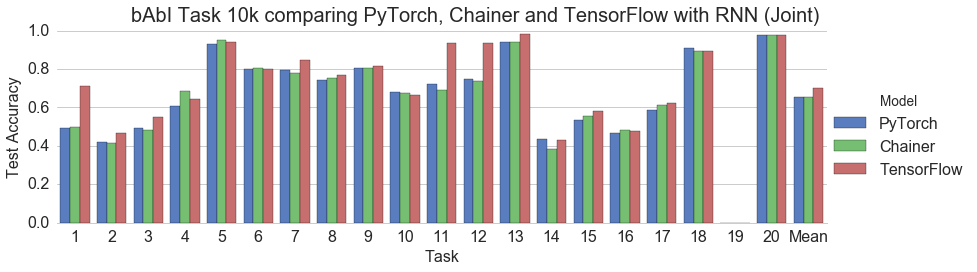

In [5]:
model_names = ['PyTorch', 'Chainer', 'TensorFlow']
paths = ['pytorch_rnn/model_file/babi_all10k_rnn.test',
                'chainer_rnn/model_file/babi_all10k_rnn.test',
                'tensorflow_rnn/model_file/babi_all10k_rnn.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing PyTorch, Chainer and TensorFlow with RNN (Joint)',
                save_name='babi_all10k_rnn_pytorch_chainer_tensorflow')

__TensorFlow__ may be good because it doesn't use truncated BPTT.  

Note that the correct labels in __Task 19 (path finding)__ are two words, but RNN generates only one word.  

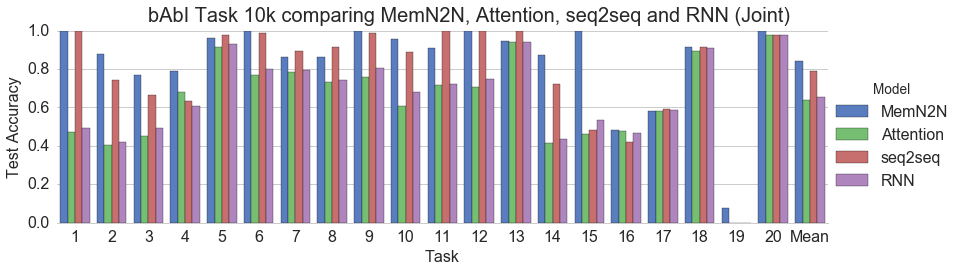

In [6]:
model_names = ['MemN2N', 'Attention', 'seq2seq', 'RNN']
paths = ['chainer_memn2n/model_file/babi_all10k_memn2n_adj_no_ls.test',
                'pytorch_attention/model_file/babi_all10k_atte.test',
                'pytorch_attention/model_file/babi_all10k_s2s.test',
                'pytorch_rnn/model_file/babi_all10k_rnn.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing MemN2N, Attention, seq2seq and RNN (Joint)',
                save_name='babi_all10k_memn2n_atte_s2s_rnn')

Note that the correct labels in __Task 19 (path finding)__ are two words, but RNN generates only one word.  
The correct labels in __Task 8 (lists/sets)__ also has two or more words, but the majority is one word.  

### Seq2seqAgent

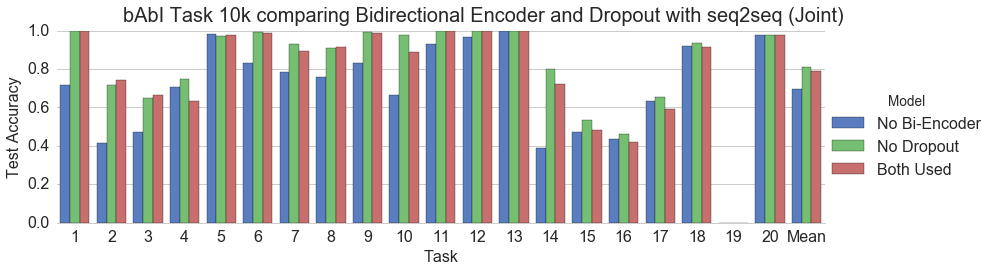

In [7]:
model_names = ['No Bi-Encoder', 'No Dropout', 'Both Used']
paths = ['pytorch_attention/model_file/babi_all10k_s2s_no_bi.test',
                'pytorch_attention/model_file/babi_all10k_s2s_no_drop.test',
                'pytorch_attention/model_file/babi_all10k_s2s.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing Bidirectional Encoder and Dropout with seq2seq (Joint)',
                save_name='babi_all10k_s2s_bi_drop')

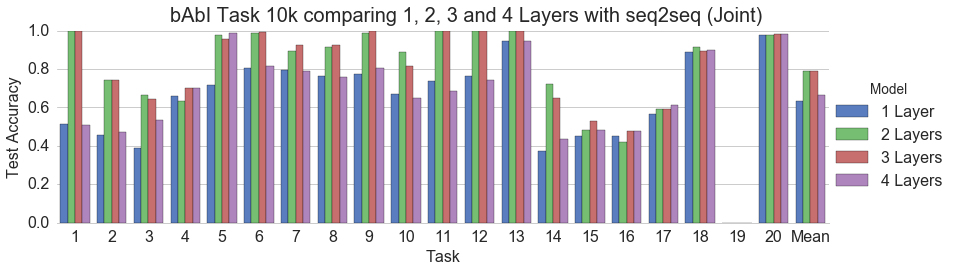

In [8]:
model_names = ['1 Layer', '2 Layers', '3 Layers', '4 Layers']
paths = ['pytorch_attention/model_file/babi_all10k_s2s_1_layer.test',
                'pytorch_attention/model_file/babi_all10k_s2s.test',
                'pytorch_attention/model_file/babi_all10k_s2s_3_layer.test',
                'pytorch_attention/model_file/babi_all10k_s2s_4_layer.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing 1, 2, 3 and 4 Layers with seq2seq (Joint)',
                save_name='babi_all10k_s2s_1_2_3_4_layers')

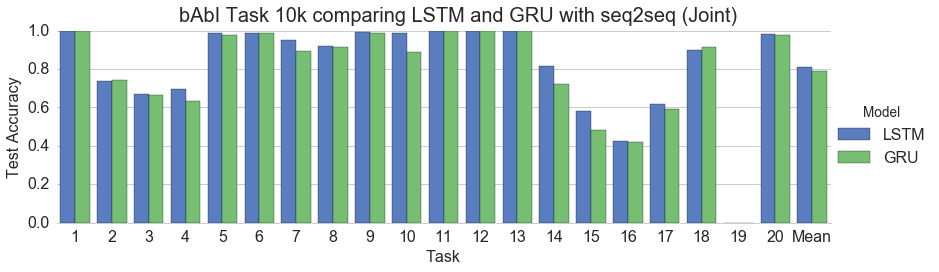

In [9]:
model_names = ['LSTM', 'GRU']
paths = ['pytorch_attention/model_file/babi_all10k_s2s_lstm.test',
                'pytorch_attention/model_file/babi_all10k_s2s.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing LSTM and GRU with seq2seq (Joint)',
                save_name='babi_all10k_s2s_lstm_gru')

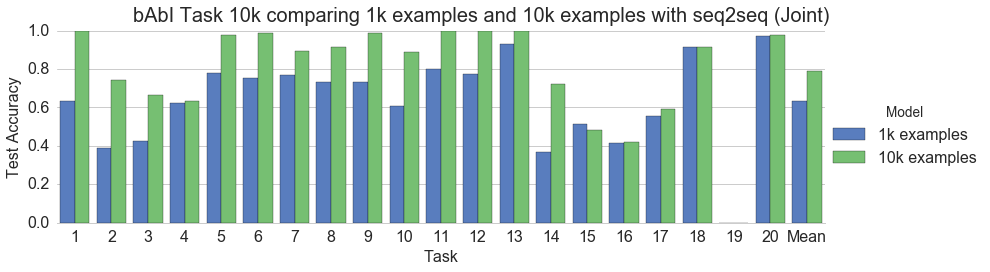

In [10]:
model_names = ['1k examples', '10k examples']
paths = ['pytorch_attention/model_file/babi_all1k_s2s.test',
                'pytorch_attention/model_file/babi_all10k_s2s.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing 1k examples and 10k examples with seq2seq (Joint)',
                save_name='babi_all1k_all10k_s2s')

### MemN2NAgent

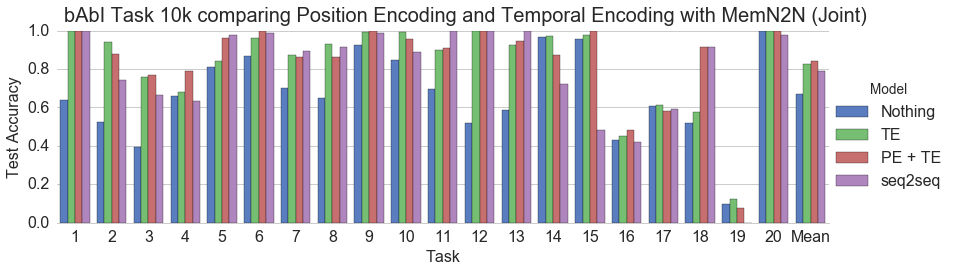

In [11]:
model_names = ['Nothing', 'TE', 'PE + TE', 'seq2seq']
paths = ['chainer_memn2n/model_file/babi_all10k_memn2n_no_pe_te_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_no_pe_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_adj_no_ls.test',
                'pytorch_attention/model_file/babi_all10k_s2s.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing Position Encoding and Temporal Encoding with MemN2N (Joint)',
                save_name='babi_all10k_memn2n_pe_te')

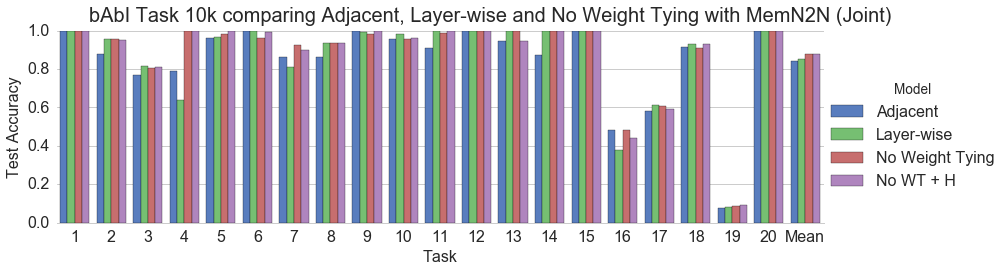

In [12]:
model_names = ['Adjacent', 'Layer-wise', 'No Weight Tying', 'No WT + H']
paths = ['chainer_memn2n/model_file/babi_all10k_memn2n_adj_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_lw_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_no_wt_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_no_wt_no_ls_H.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing Adjacent, Layer-wise and No Weight Tying with MemN2N (Joint)',
                save_name='babi_all10k_memn2n_adj_lw')

H is the same as the transition matrix used in Layer-wise Weight Tying.  

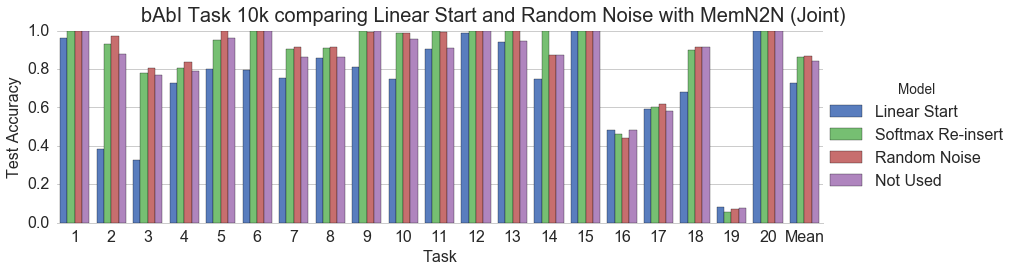

In [13]:
model_names = ['Linear Start', 'Softmax Re-insert', 'Random Noise', 'Not Used']
paths = ['chainer_memn2n/model_file/babi_all10k_memn2n_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_ls_reinsert.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_rn_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_adj_no_ls.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing Linear Start and Random Noise with MemN2N (Joint)',
                save_name='babi_all10k_memn2n_ls_rn')

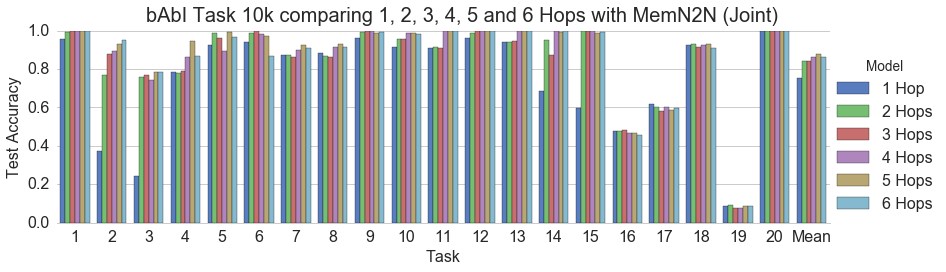

In [14]:
model_names = ['1 Hop', '2 Hops', '3 Hops', '4 Hops', '5 Hops', '6 Hops']
paths = ['chainer_memn2n/model_file/babi_all10k_memn2n_1_hop_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_2_hop_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_adj_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_4_hop_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_5_hop_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_6_hop_no_ls.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing 1, 2, 3, 4, 5 and 6 Hops with MemN2N (Joint)',
                save_name='babi_all10k_memn2n_1_2_3_4_5_6_hops')

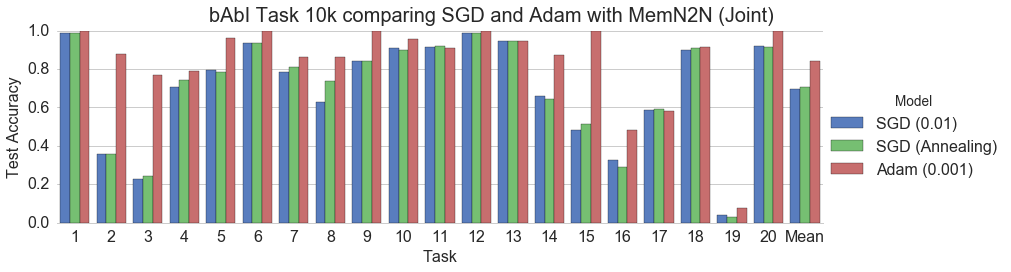

In [15]:
model_names = ['SGD (0.01)', 'SGD (Annealing)', 'Adam (0.001)']
paths = ['chainer_memn2n/model_file/babi_all10k_memn2n_sgd_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_sgd_annealing_no_ls.test',
                'chainer_memn2n/model_file/babi_all10k_memn2n_adj_no_ls.test']

ordered_accuracies = paths2ordered_accuracies(paths)
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing SGD and Adam with MemN2N (Joint)',
                save_name='babi_all10k_memn2n_sgd_adam')

### Outperform the Results of the Paper!

Benchmark results to compare this repo implementation, the author's
[original Matlab code](https://github.com/facebook/MemNN/tree/master/MemN2N-babi-matlab) 
on the [bAbI tasks](http://fb.ai/babi) and the paper description.  

Default Configuration: 3 Hops, Position Encoding (PE), Temporal Encoding (TE), Linear Start (LS), Random Noise (RN) and Adjacent Weight Tying.  

- this repo: No weight tying, No Linear Start, 5 Hops, Hidden Size 128 and Adam (Annealing). It failed at linear start. (trained only once)  
- matlab: [check it](https://github.com/vinhkhuc/MemN2N-babi-python/tree/master/bechmarks)
- paper: repeated 10 times with different random initializations, and picked the one with the lowest training error. [check it](https://arxiv.org/abs/1503.08895)  

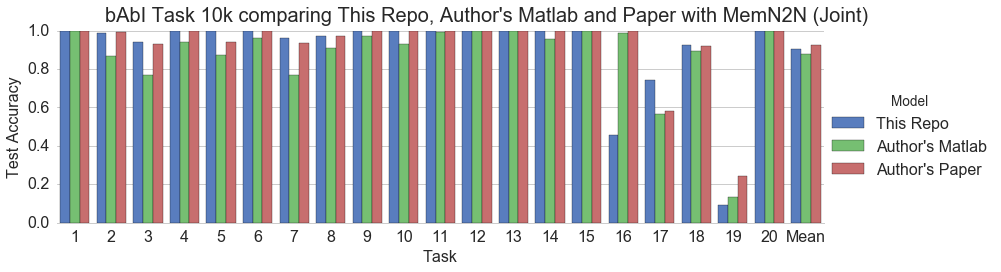

In [16]:
matlab = [1.0, 0.869, 0.766, 0.941, 0.871,
                0.963, 0.771, 0.909, 0.973, 0.928,
                0.992, 0.999, 0.999, 0.958, 1.0,
                0.988, 0.564, 0.895, 0.133, 1.0, 0.876]

paper = [1.0, 0.99, 0.932, 1.0, 0.939,
                0.999, 0.934, 0.973, 1.0, 0.995,
                1.0, 0.999, 1.0, 1.0, 0.998,
                0.998, 0.582, 0.92, 0.243, 1.0, 0.925]

model_names = ['This Repo', 'Author\'s Matlab', 'Author\'s Paper']
paths = ['chainer_memn2n/model_file/babi_all10k_memn2n_best_no_ls.test']

this = paths2ordered_accuracies(paths)
ordered_accuracies = this + [matlab, paper]
babi_plot(model_names,
                ordered_accuracies,
                title='bAbI Task 10k comparing This Repo, Author\'s Matlab and Paper with MemN2N (Joint)',
                save_name='babi_all10k_memn2n_this_matlab_paper')

bAbI Task paper consider a task successfully passed if ≥ 95% accuracy is obtained.  

In the best results of the paper, __14/20__ tasks succeeded.  
The best settings of this repo has succeeded in __15/20__ tasks!  

```
this repo = [1.0, 0.985, 0.938, 1.0, 0.996,
                1.0, 0.96, 0.971, 1.0, 0.995,
                1.0, 1.0, 1.0, 0.999, 0.999,
                0.458, 0.74, 0.926, 0.092, 1.0,
                0.9029]
```

# Visualize Losses

In [17]:
def loss_plot(dictionary, max_time=1000, title=None, save_name=None):
    sns.set_style("darkgrid")
    plt.figure(figsize=(12, 4))
    plt.plot(np.array(dictionary["losses"]), label='train loss')
    plt.xlim(0, max_time)
    plt.ylim(0, 2)
    plt.title(title, fontsize=20)
    plt.xlabel('time (x10 sec)', fontsize=16)
    plt.ylabel('loss', fontsize=16)
    plt.legend(fontsize=16)
    plt.tick_params(labelsize=16)
    plt.tight_layout()
    if save_name:
        plt.savefig("saved_image/{}.png".format(save_name), format='png', dpi=200)
    plt.show()

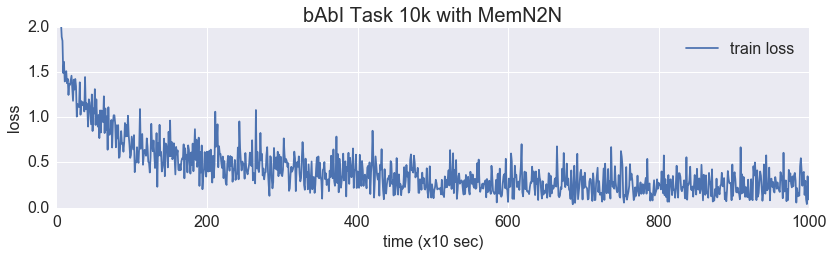

In [18]:
path = 'chainer_memn2n/model_file/babi_all10k_memn2n_adj_no_ls.loss'

with open(path, 'r') as read:
    dictionary = json.load(read)

loss_plot(dictionary,
                title='bAbI Task 10k with MemN2N',
                max_time=1000,
                save_name='babi_all10k_memn2n_no_ls_loss')

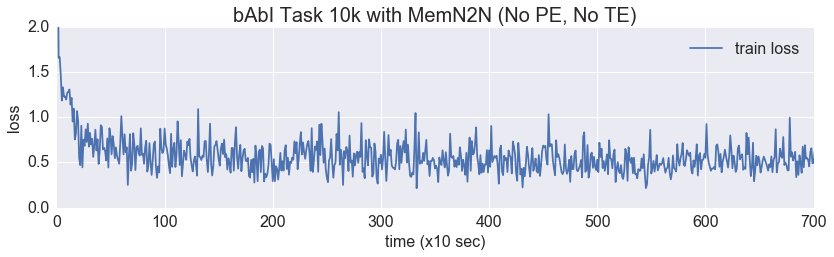

In [19]:
path = 'chainer_memn2n/model_file/babi_all10k_memn2n_no_pe_te_ls.loss'

with open(path, 'r') as read:
    dictionary = json.load(read)

loss_plot(dictionary,
                title='bAbI Task 10k with MemN2N (No PE, No TE)',
                max_time=700,
                save_name='babi_all10k_memn2n_no_pe_te_ls_loss')

# Visualize Attention Weights

In [20]:
def attention_plot(sources, targets, weights, model, title=None, sub_titles=None, save_name=None):
    exs_num = len(weights)
    sns.set(style="white", font_scale = 1.3)
    if model == 'atte':
        w_num = exs_num % 10 if exs_num % 10 != 0 else 10
        h_num = (exs_num // 10) + 1
        width = w_num * 2.5
        height = h_num * len(sources[0]) * 0.3
    if model == 'memn2n':
        w_num = exs_num % 4 if exs_num % 4 != 0 else 4
        h_num = (exs_num // 4) + 1
        width = w_num * 6
        height = h_num * len(sources[0]) * 0.4
    fig = plt.figure(figsize=(width, height))
    fig.suptitle(title, fontsize=20, y=1 + (0.25 / height))
    for ex in range(exs_num):
        ax = fig.add_subplot(h_num, w_num, ex+1)
        ax.set_title(sub_titles[ex])
        sns.heatmap(weights[ex], xticklabels=targets[ex], yticklabels=sources[ex])
    plt.tight_layout()
    if save_name:
        fig.savefig("saved_image/{}.png".format(save_name), bbox_inches='tight', format='png', dpi=200)

### Let's Plot Attention Weights in Single Training Independently!  

### Seq2seqAgent

seq2seq with Attention failed, but I found several hypotheses.  

- __Dot__ Attention is easy to select the end of the sentence.  
- __General__ Attention is easy to select the beginning or end of the sentence.  
- __Concat__ Attention is easy to select the whole sentence.  

In [21]:
def make_attentions_for_single_task(dictionary):
    for task in dictionary["attention_weights"].keys(): pass
    exs_num = len(dictionary["attention_weights"][task])
    sources = []
    targets = []
    weights = []
    for ex in range(exs_num):
        sources.append(dictionary["attention_weights"][task][ex]["source"])
        targets.append(dictionary["attention_weights"][task][ex]["target"])
        weights.append(dictionary["attention_weights"][task][ex]["weight"])
    return task, sources, targets, weights

In [22]:
def attention_plot_for_single_task_atte(path, name):
    with open(path, 'r') as read:
        dictionary = json.load(read)
    task, sources, targets, weights = make_attentions_for_single_task(dictionary)

    attention_plot(
                    sources=sources[:5],
                    targets=targets[:5],
                    weights=weights[:5],
                    model='atte',
                    title='bAbI Task 13 with Luong\'s {}'.format(name),
                    sub_titles=['Sample '+str(i) for i in range(1,6)],
                    save_name='babi_task13_atte_{}_plot'.format(name.lower())
                    )

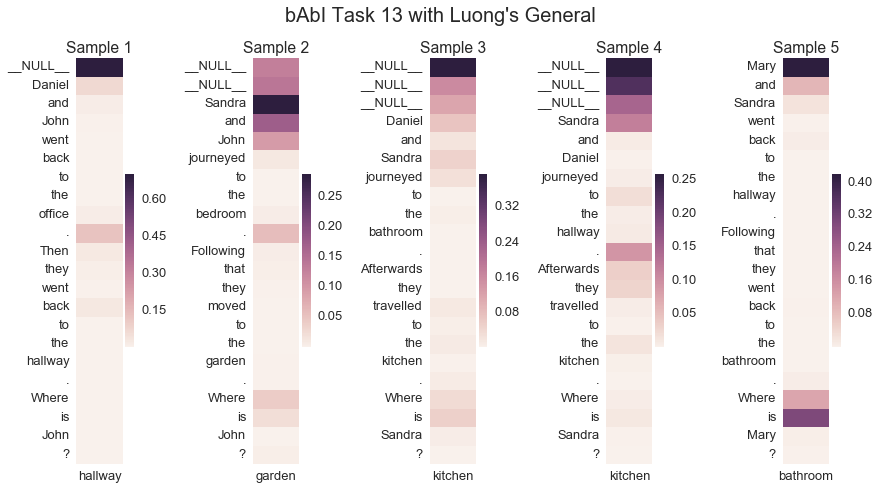

In [23]:
path = 'pytorch_attention/model_file/babi_task10k_13_atte_general.atte'
name = 'General'
attention_plot_for_single_task_atte(path, name)

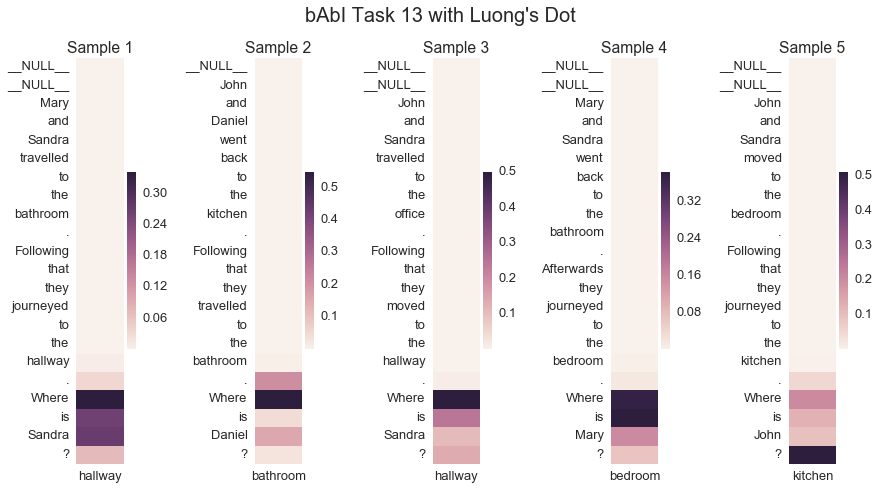

In [24]:
path = 'pytorch_attention/model_file/babi_task10k_13_atte_dot.atte'
name = 'Dot'
attention_plot_for_single_task_atte(path, name)

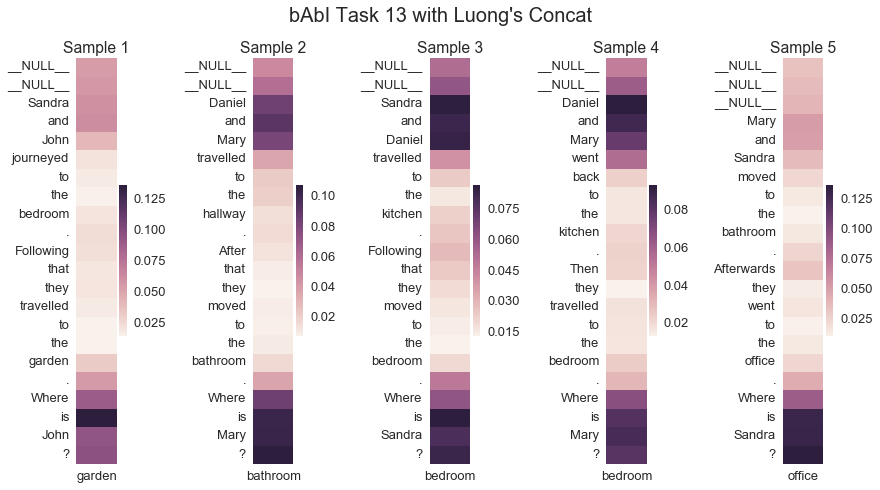

In [25]:
path = 'pytorch_attention/model_file/babi_task10k_13_atte_concat.atte'
name = 'Concat'
attention_plot_for_single_task_atte(path, name)

### Let's Plot Attention Weights in Joint Training (aka Multi-Task Learning) !  

In [26]:
def make_ordered_attentions_for_all_tasks(dictionary):
    tasks = list(dictionary["attention_weights"].keys())
    if 'babi:Task1k:1' in tasks:
        ordered_tasks = ['babi:Task1k:'+str(i) for i in range(1,21)]
    elif 'babi:Task10k:1' in tasks:
        ordered_tasks = ['babi:Task10k:'+str(i) for i in range(1,21)]
    else:
        raise NotImplementedError('Other than visualization of bAbI Task not supported yet')

    exs_num = len(dictionary["attention_weights"][ordered_tasks[0]])
    sources = []
    targets = []
    weights = []
    others = []
    for i in range(20):
        weights.append([np.array(dictionary["attention_weights"][ordered_tasks[i]][ex]["weight"]) for ex in range(exs_num)])
        sources.append([dictionary["attention_weights"][ordered_tasks[i]][ex]["source"] for ex in range(exs_num)])
        targets.append([dictionary["attention_weights"][ordered_tasks[i]][ex]["target"] for ex in range(exs_num)])
        others.append([dictionary["attention_weights"][ordered_tasks[i]][ex]["other"] for ex in range(exs_num)])
    return ordered_tasks, weights, sources, targets, others

In [27]:
def attention_plot_for_all_tasks_atte(tasks, sample):
    path = 'pytorch_attention/model_file/babi_all10k_atte_cont.atte'

    with open(path, 'r') as read:
        dictionary = json.load(read)
    _, weights, sources, targets, others = make_ordered_attentions_for_all_tasks(dictionary)
    
    attention_plot(
                    sources=[sources[task][sample][-20:] for task in tasks],
                    targets=[targets[task][sample][:1] for task in tasks],
                    weights=[weights[task][sample][-20:,:1] for task in tasks],
                    model='atte',
                    title='bAbI Task 10k with Attention (Luong\'s General) - sample {}'.format(str(sample)),
                    sub_titles=['Task '+str(task+1) for task in tasks],
                    save_name='babi_all10k_atte_sample_{}_plot'.format(str(sample))
                    ) 

The source statement is actually longer (about 200 words), but most words were `__NULL__` and attention only turned to the end of the sentence so I plotted only 20 words at the end of the sentence.  

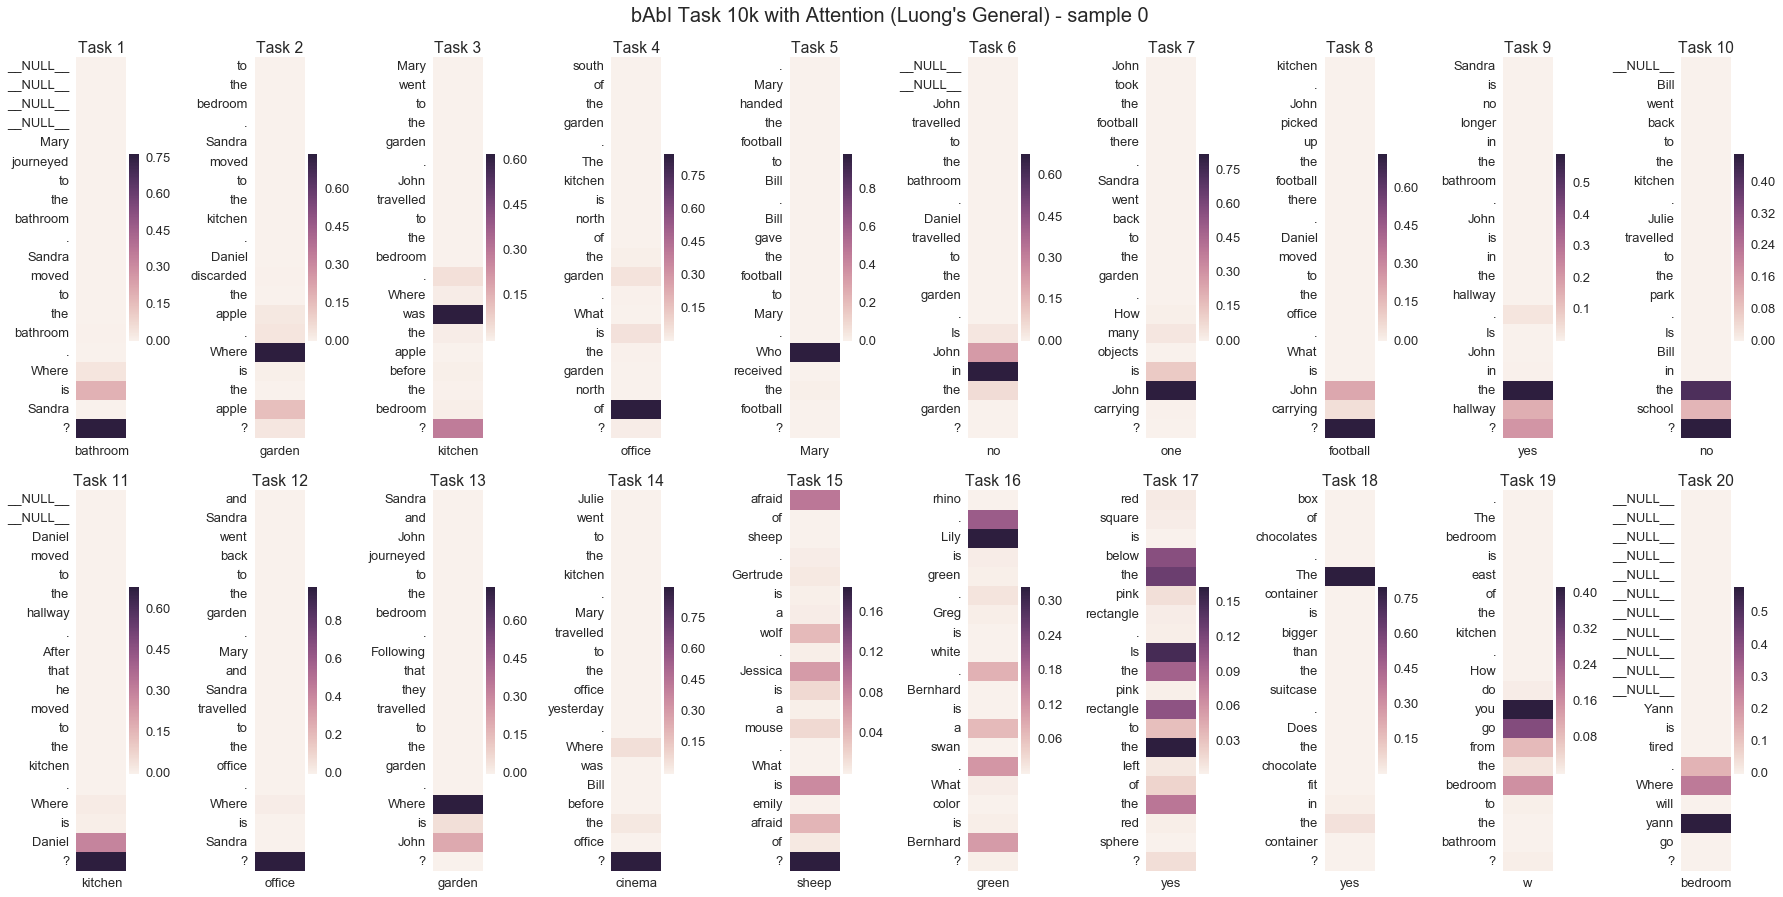

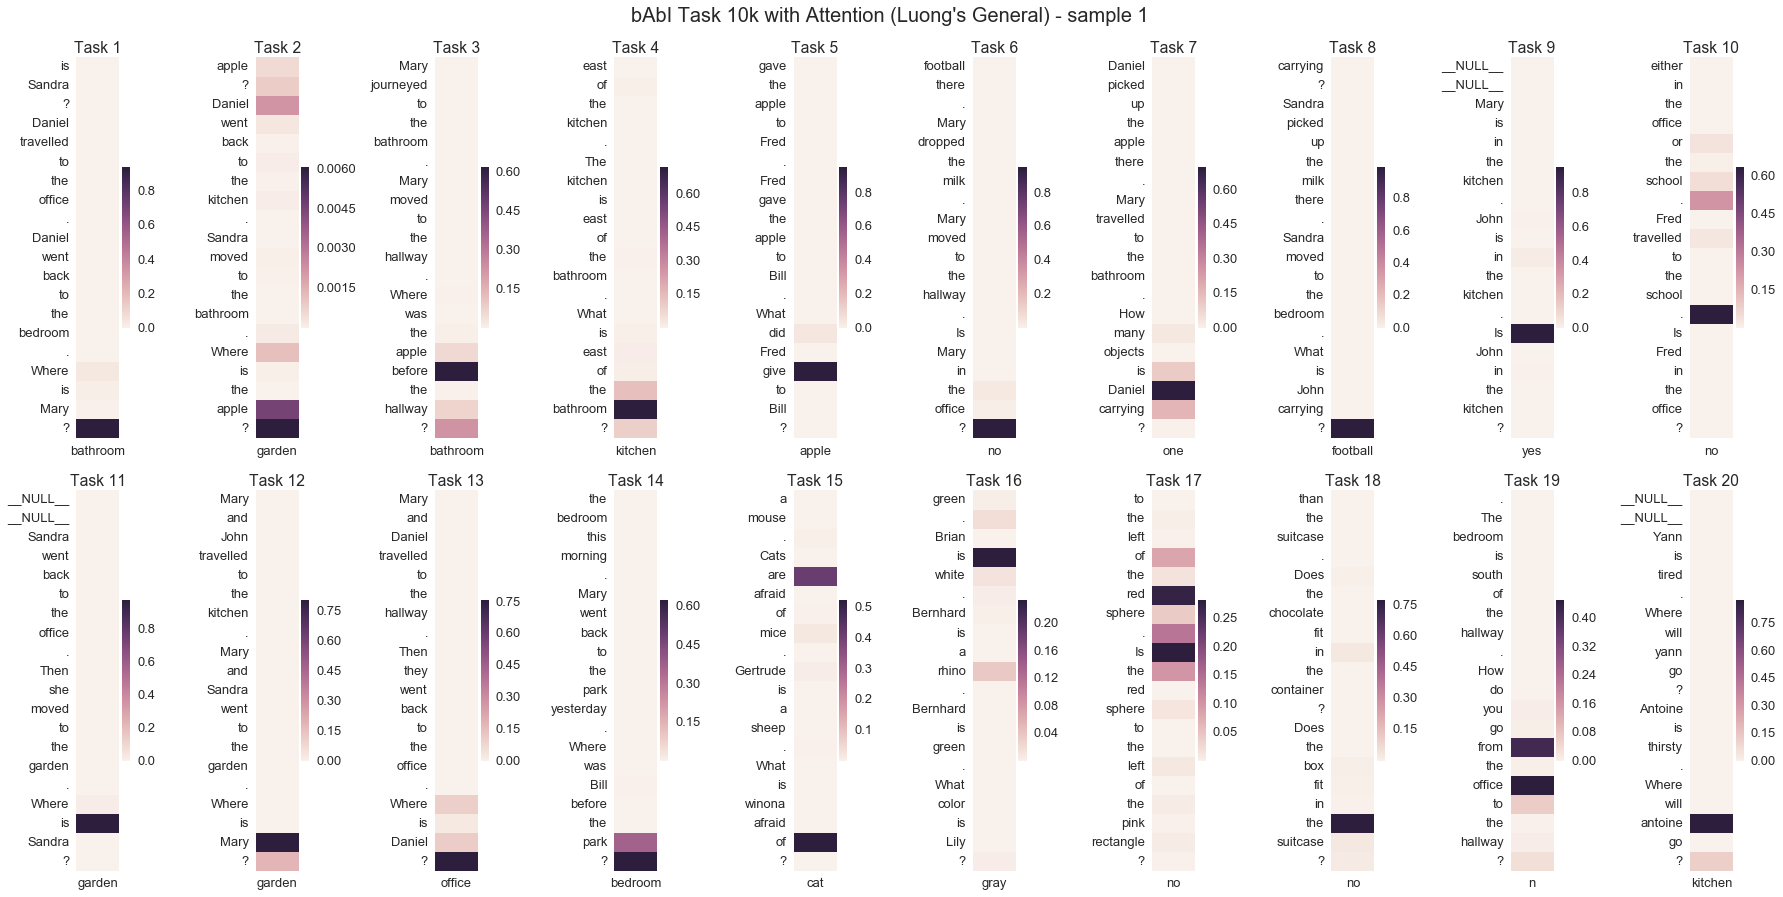

In [28]:
tasks = range(20)
for sample in range(2):
    attention_plot_for_all_tasks_atte(tasks, sample)

seq2seq with Attention failed.  

### MemN2NAgent

In [29]:
def attention_plot_for_all_tasks_memn2n(tasks, sample):
    path = 'chainer_memn2n/model_file/babi_all10k_memn2n_best_no_ls.atte'

    with open(path, 'r') as read:
        dictionary = json.load(read)
    _, weights, sources, targets, others = make_ordered_attentions_for_all_tasks(dictionary)

    attention_plot(
                    sources=[sources[task][sample][-8:] for task in tasks],
                    targets = [[others[task][sample] + ' ' + ' '.join(targets[task][sample][:]), *('',)*2] for task in tasks],
                    weights = [weights[task][sample][-8:,:] for task in tasks],
                    model='memn2n',
                    title='bAbI Task 10k with End-To-End Memory Network - sample {}'.format(str(sample)),
                    sub_titles=['Task '+str(task+1) for task in tasks],
                    save_name='babi_all10k_memn2n_sample_{}_plot'.format(str(sample))
                    )

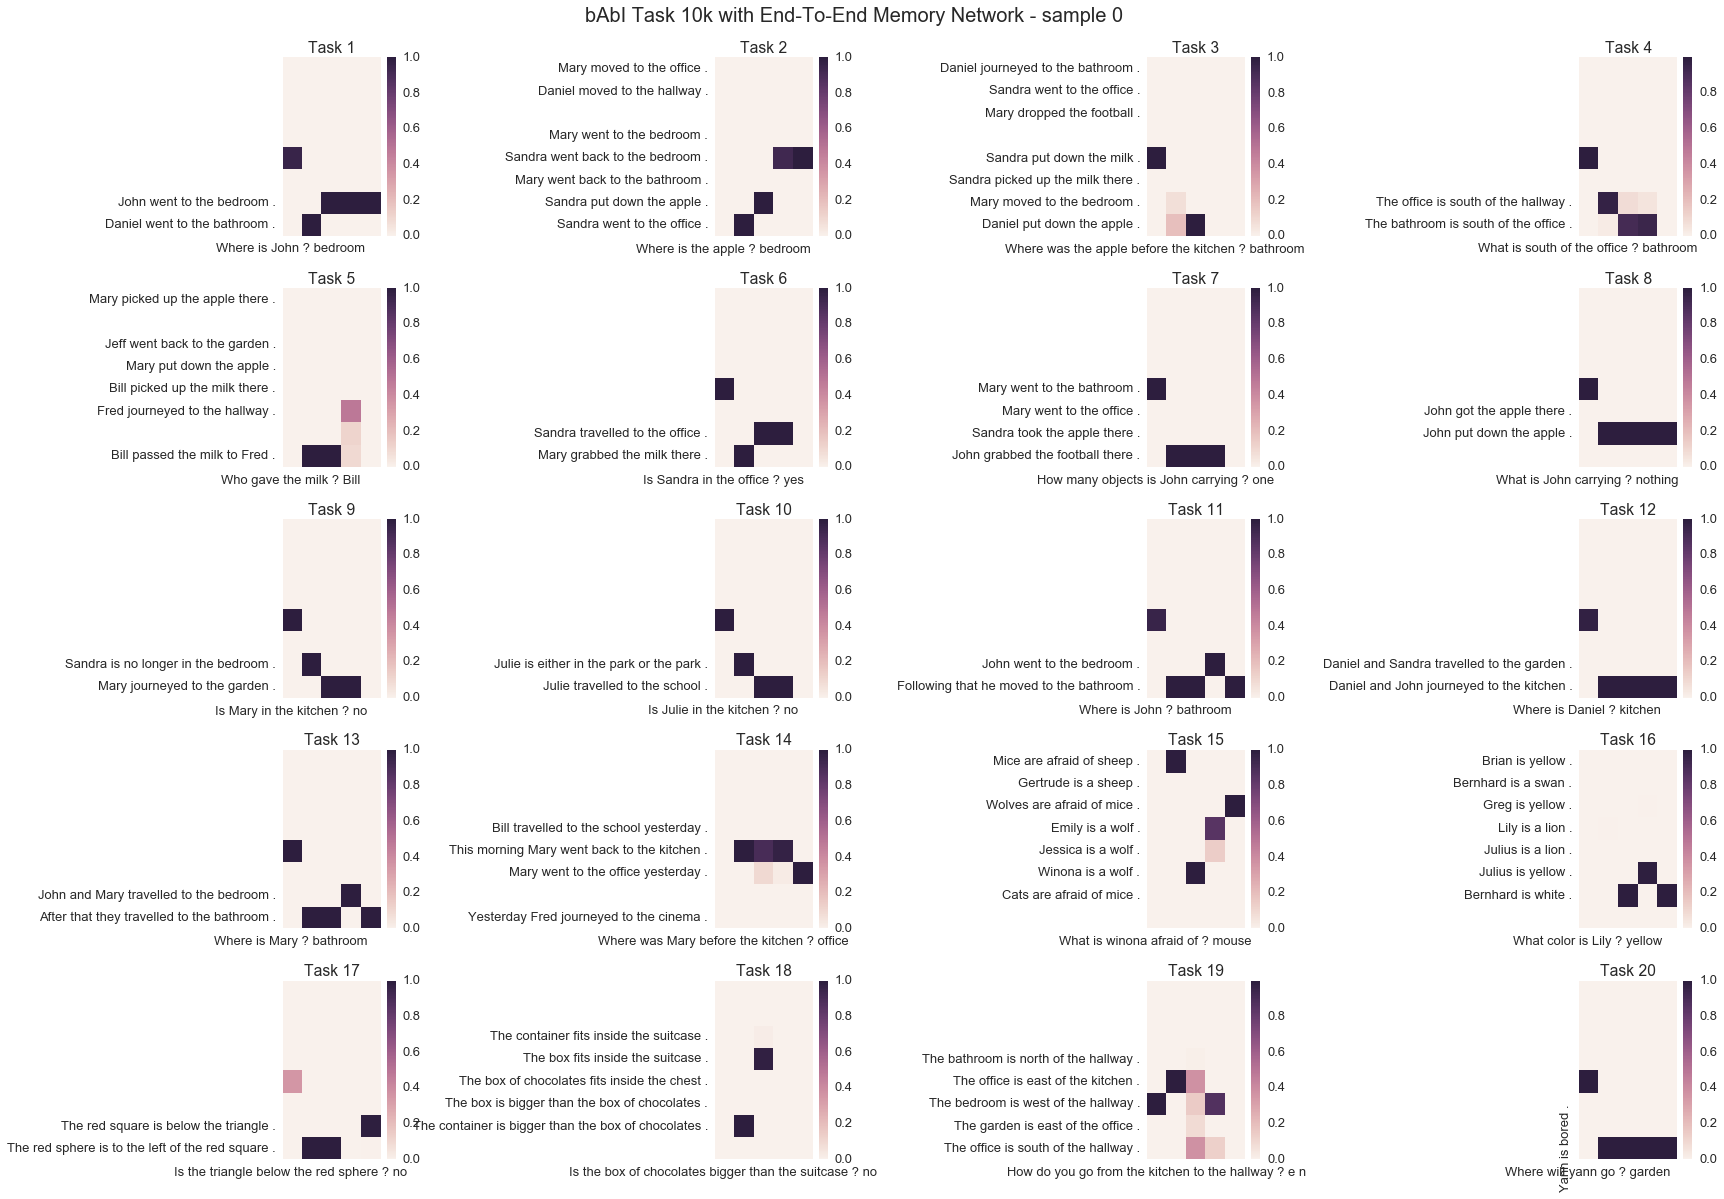

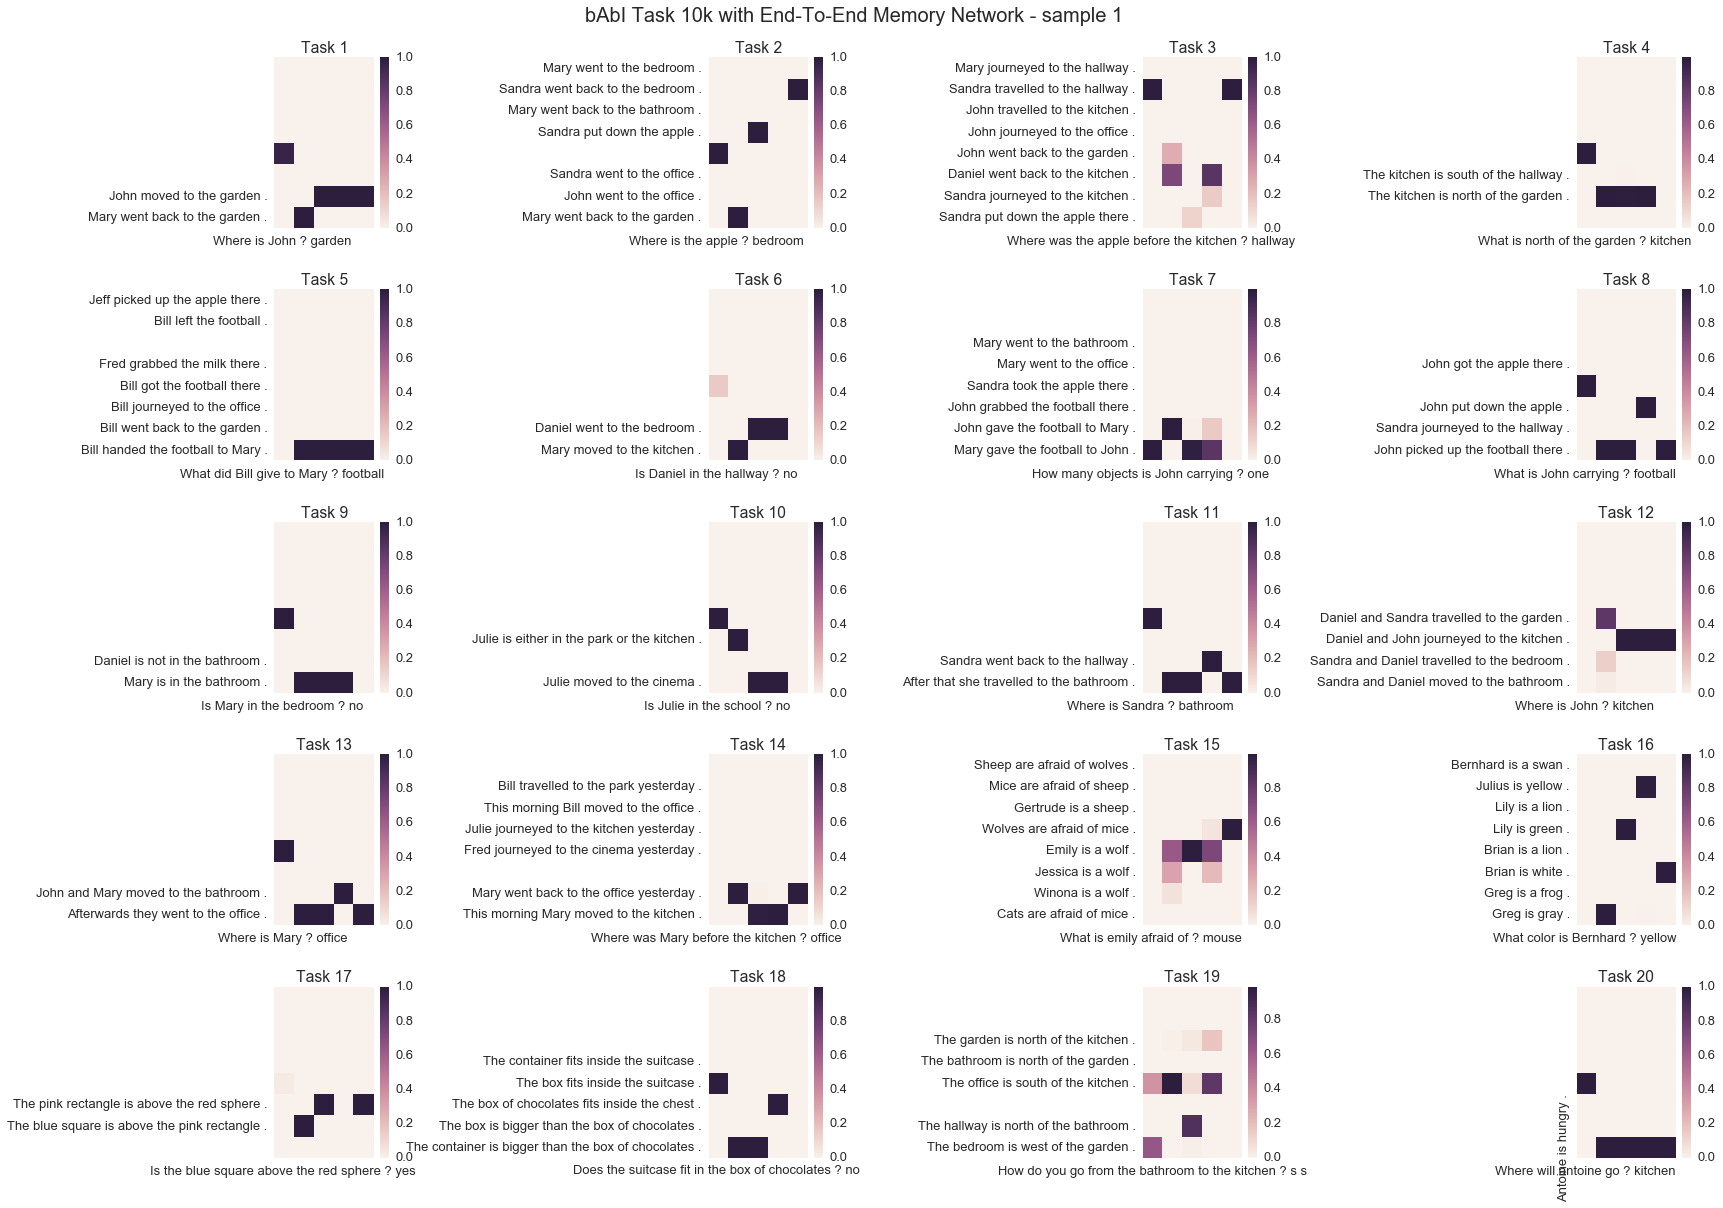

In [30]:
tasks = range(20)
for sample in range(2):
    attention_plot_for_all_tasks_memn2n(tasks, sample)

# Visualize Position Encoding

In [31]:
# See chainer_memn2n/chainer_memn2n.py for details.

def pe(bs, ms, ss, hs): # batch x memory x sequence x hidden
    # Make k
    k = np.arange(1, hs + 1, dtype=np.float32)
    k = k.reshape((1, hs)) # 1 x hidden
    # Make l
    l = np.ones((bs, ms, ss, hs)).astype(np.float32)
    for _x in range(bs):
        for _s in range(ms):
            # Make J (Sampling from normal distribution)
            J = np.random.normal(ss-1, 1, 1).astype(np.int32)
            J = int(np.clip(J, 0, ss))
            if J != 0:
                # Make j
                j = np.arange(1, J + 1, dtype=np.float32)
                j = j.reshape((J, 1)) # non-0 sequence x 1
                # Make l
                _l = (1 - j / J) - (k / hs) * (1 - 2 * j / J)
                l[_x, _s, :J, :] = _l
    return l

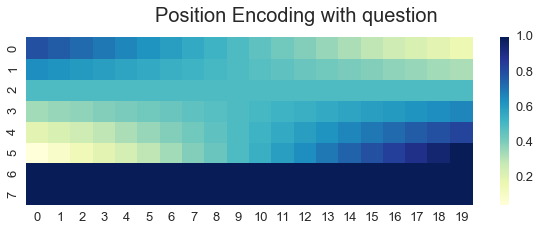

In [32]:
pe_q = pe(32, 1, 8, 20)[0,0]
fig = plt.figure(figsize=(10,3))
fig.suptitle("Position Encoding with question", fontsize=20, y=1.04)
sns.heatmap(pe_q, xticklabels=np.arange(20), yticklabels=np.arange(8), cmap="YlGnBu")
fig.savefig("saved_image/pe_q.png", bbox_inches='tight', format='png', dpi=200)

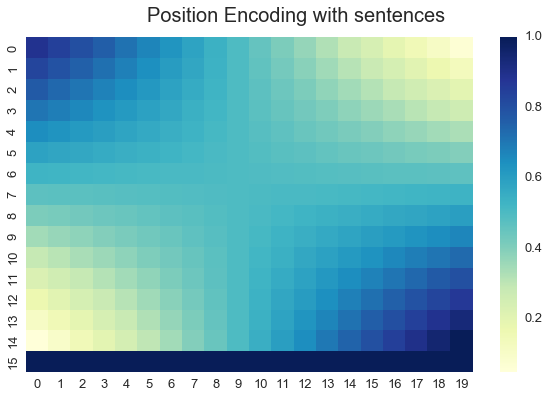

In [33]:
pe_x = pe(32, 50, 16, 20)[0,0]
fig = plt.figure(figsize=(10,6))
fig.suptitle("Position Encoding with sentences", fontsize=20, y=0.97)
sns.heatmap(pe_x, xticklabels=np.arange(20), yticklabels=np.arange(16), cmap="YlGnBu")
fig.savefig("saved_image/pe_x.png", bbox_inches='tight', format='png', dpi=200)

Element of 0 vector (`__NULL__`) is 1.  